In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, datasets

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [6]:
X_train.shape

(60000, 28, 28, 1)

In [7]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [8]:
X_test.shape

(10000, 28, 28, 1)

In [9]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [10]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

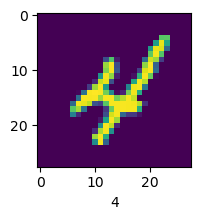

In [12]:
plot_sample(X_train_scaled, y_train, 9)

In [13]:
model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

In [16]:
history = model.fit(X_train_scaled, y_train, batch_size=64, epochs=10, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 19s 25ms/step - loss: 0.2109 - accuracy: 0.9366 - val_loss: 0.0685 - val_accuracy: 0.9796
Epoch 2/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0654 - accuracy: 0.9803 - val_loss: 0.0590 - val_accuracy: 0.9833
Epoch 3/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0532 - val_accuracy: 0.9839
Epoch 4/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0466 - val_accuracy: 0.9862
Epoch 5/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0277 - accuracy: 0.9915 - val_loss: 0.0433 - val_accuracy: 0.9870
Epoch 6/10
750/750 [==============================] - 15s 20ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0426 - val_accuracy: 0.9877
Epoch 7/10
750/750 [==============================] - 14s 19ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0430 - val_accuracy:

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

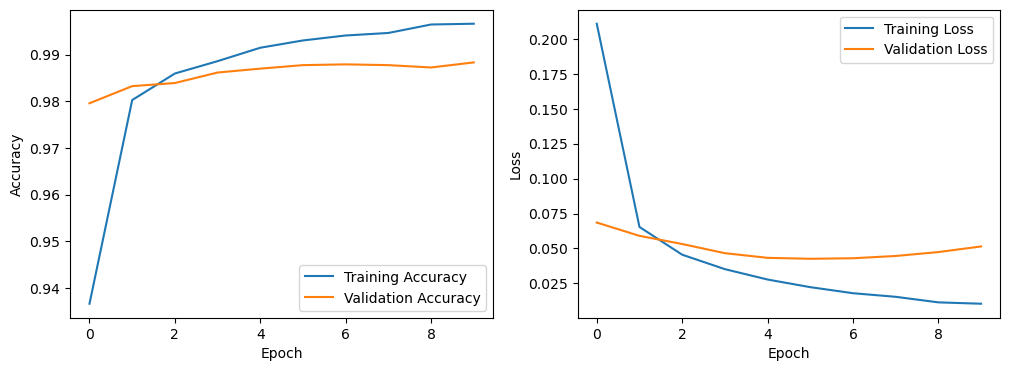

In [18]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [19]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0454 - accuracy: 0.9872


[0.045423686504364014, 0.9872000217437744]

In [20]:
y_pred = model.predict(X_test_scaled)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[5.47125886e-11, 8.49614712e-10, 3.89561827e-10, 2.28101893e-09,
        6.46462067e-15, 2.85974152e-12, 4.06139187e-18, 9.99999940e-01,
        1.67012751e-10, 8.73691189e-11],
       [3.77932026e-11, 1.16840859e-09, 9.99999940e-01, 7.18694895e-12,
        2.43674481e-15, 1.03260900e-16, 2.33363296e-13, 2.40513252e-12,
        3.41789708e-10, 3.65218669e-15],
       [4.04414884e-08, 9.99995410e-01, 3.09787596e-09, 3.56464287e-15,
        1.08105155e-06, 4.15089147e-07, 3.78679132e-08, 2.79749611e-06,
        2.21008122e-07, 2.57311644e-10],
       [9.99999940e-01, 1.02814553e-13, 7.06811068e-11, 2.94541477e-15,
        1.74404588e-11, 8.89139040e-11, 7.04163572e-09, 6.27407681e-10,
        1.46878516e-11, 3.67124192e-10],
       [5.90195246e-16, 4.30813024e-12, 8.79814179e-13, 2.25528660e-17,
        9.99999940e-01, 3.09377069e-15, 2.47631591e-16, 1.02310195e-10,
        1.20726649e-14, 2.57983257e-09]], dtype=float32)

In [21]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

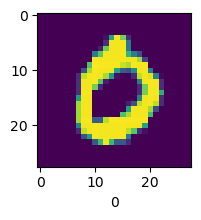

In [23]:
plot_sample(X_test, y_test,3)

In [24]:
classes[y_classes[3]]

0